<a href="https://colab.research.google.com/github/luiscardon/Labo-II-2023/blob/main/raices_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# funciones00.py
import numpy as np

# =================================
# Definicion de la funcion
def fun1(x):
    return x**3-5*x-9

# =================================
# Programa principal
# Entrada de datos
a=1
b=2

# Impresion
rango = np.linspace(a, b, 5)
print(rango)
print(fun1(rango))


[1.   1.25 1.5  1.75 2.  ]
[-13.       -13.296875 -13.125    -12.390625 -11.      ]


# Escribiendo un modulo  en colab

El siguinte script funciona perfectamente en forma autónoma.
Pero la idea aquí es que queremos usar en lo sucesivo este script como módulo, de manera que podamos llamar sus funciones desde otros programas.
Por eso es necesario escribir un archivo funciones0.py, como se hace en la primera linea del siguiente script.


In [7]:
%%writefile funciones0.py
# funciones0.py
import numpy as np

def fun1(x):
    return x**3-5*x-9

def fun2(k,t,v,m,g):
    """Caida libre con friccion
       k coeficiente de friccion
       t tiempo
       v velocidad inicial
       m masa
       g aceleracion de la gravedad"""

    return (g*m/k)*(1-np.exp(-k*t/m))-v


print(fun1(5))
print(fun2(5,3,10,5,9.8))


Overwriting funciones0.py


Note que no ejecuta la función. Note también que, picando sobre el símbolo de carpeta a su izquierda, verá que aparece el archivo funciones0.py
El comando de la shell cat, lo muestra como si lo hubiera enviado a la terminal, como se hace a continuación.

In [8]:
%cat  funciones0.py

# funciones0.py
import numpy as np

def fun1(x):
    return x**3-5*x-9

def fun2(k,t,v,m,g):
    """Caida libre con friccion
       k coeficiente de friccion
       t tiempo
       v velocidad inicial
       m masa
       g aceleracion de la gravedad"""

    return (g*m/k)*(1-np.exp(-k*t/m))-v


print(fun1(5))
print(fun2(5,3,10,5,9.8))


# Problema resuleto.
Hecha la escritura mostrada en la celda precedente, ahora puede importar funciones0.py a cualquir otro script.
Cuidado, el almacenamiento de funciones9.py NO ES PERMANENTE, el archivo desaparecería cuando acabe el runtime de la sesión de colab.

In [9]:
# ejemplo1.py
import numpy as np
import funciones0 as f

# =================================
# Programa principal
# Entrada de datos
a=1
b=2

# Impresion
rango = np.linspace(a, b, 5)
print(rango)
print(f.fun1(rango))



[1.   1.25 1.5  1.75 2.  ]
[-13.       -13.296875 -13.125    -12.390625 -11.      ]


In [10]:
# funciones1.py
import numpy as np

def fun1(x):
    return x**3-5*x-9

def fun2(k,t,v,m,g):
    """Caida libre con fricciom
       k variable independiente coeficiente de arrastre
       parametros:
       t   tiempo
       v velocidad inicial
       m masa
       g aceleracion de la gravedad"""
    return (g*m/k)*(1-np.exp(-k*t/m))-v

# Programa principal
# Se llama a ejecucion las funciones definidas
# Este programa se ejecutara como programa autonomo.
# Sus funciones tambien pueden ser llamadas desde otro programa

if __name__ == "__main__":
    print(fun1(-10))
    print(fun2(5, 3,10,5,9.8))


-959
-0.6879132700050654


# funciones.py
Esta es solo una versión mejorada de funciones0.py


In [12]:
%%writefile funciones.py
# funciones.py
import numpy as np

# definicion de funciones

def fun1(x):
    return x**3 - 5*x - 9

def fun2(x):
    return x**3 - 5*x

# Block de prueba

def test_fun1():
    """ Compara la salida de la funcion con resultados manuales
    calculados para a=-10, b=0, c= 10"""
    tolerancia= 1.E-10
    datos=np.array([-10,0,10])
    exacta=np.array([-959, -9, 941])
    numericos=fun1(datos)
    diferencia = abs(numericos-exacta).max()
    excito = diferencia < tolerancia
    assert excito


def test_fun2():
    """ Compara la salida de la funcion con resultados manuales
    calculados para a=0,b=-np.sqrt(5),c=np.sqrt(5)"""
    tolerancia= 1.E-15
    datos=np.array([-10,0,10])
    exacta=np.array([-950, 0, 950])
    numericos=fun2(datos)
    diferencia = abs(numericos-exacta).max()
    excito = diferencia < tolerancia
    assert excito


# Programa principal
# Si se llama a ejecucion el script
# se ejecutara como programa autonomo.
# Si las funciones no pasan la prueba la
# ejecucion  se interrumpe
# Si se importa no ejecuta el programa principal
#
if __name__ == "__main__":
    test_fun1()
    test_fun2()
    print("Prueba pasada con exito")
    print("fun1", fun1(-10))
    print("fun2", fun2(0))
    print("fun2", fun2(np.sqrt(5)))
    print("fun2", fun2(-np.sqrt(5)))


Writing funciones.py


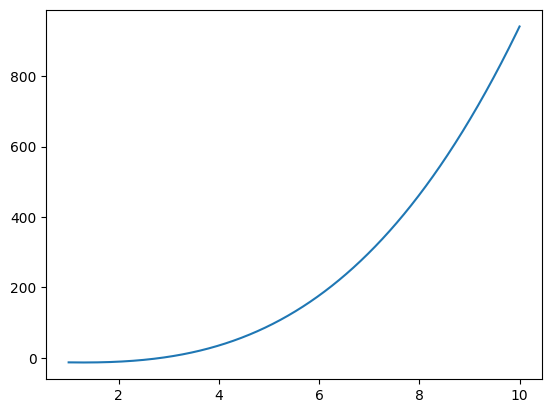

In [13]:
# ploteoBasico.py
import numpy as np
import matplotlib.pyplot as plt
import funciones as f

# Dato: intervalo de calculo
a=1
b=10
# Crea un rango de valores de x y de  y
x = np.linspace(a, b, 1000)  # abscisas discretas
y = f.fun1(x)                # coordenadas discretas
# Ploteo simple de los datos
plt.plot(x,y)
plt.show()


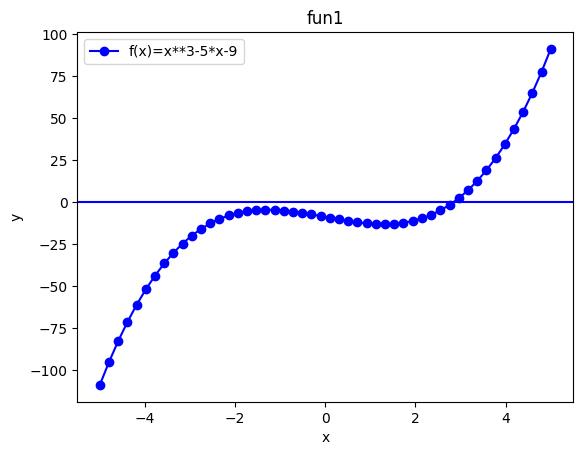

In [14]:
# ploteoIntermedio.py
import numpy as np
import matplotlib.pyplot as plt
import funciones as f


# Intervalo de calculo
a=-5
b=5
# Crea un rango de valores de x y de  y
x = np.linspace(a, b, 50)  # abscisas discretas
y = f.fun1(x)              # coordenadas discretas

# Ploteo decorado de los datos
plt.xlabel('x')
plt.ylabel('y')
plt.title('fun1')
plt.axhline(y=0, c="blue")
plt.plot(x,y,'-ob', label="f(x)=x**3-5*x-9")
plt.legend()
plt.savefig('fig-fun1.eps')
plt.show()


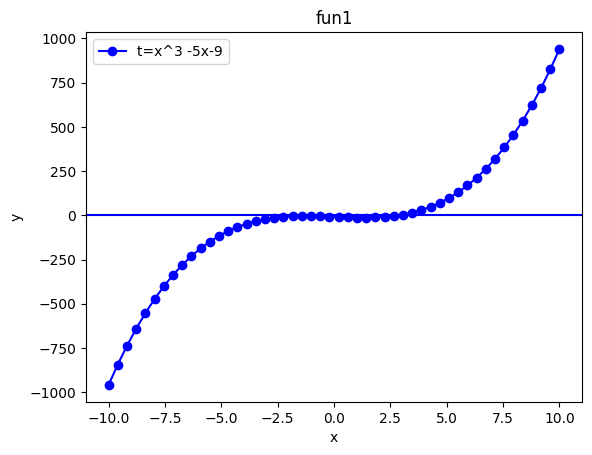

In [15]:
# miploteo.py
import numpy as np
import matplotlib.pyplot as plt
import funciones as f

def miploteo(ff, a,b,n, titulo,leyenda,archivo):
    """Funcion de ploteo
    ff funcion a plotear
    x,y valores discretos de la funcion
    a,b intervalo
    titulo titulo o nombre de la funcion
    leyenda: la funcion a grafica
    archivo: nombre del archivo a graficar
    """
    # Ploteo decorado de los datos
    # Crea un rango de valores de x y de  y
    x = np.linspace(a, b, n)  # abscisas discretas
    y = ff(x)                # coordenadas discretas

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(titulo)
    plt.axhline(y=0, c="blue")
    plt.plot(x,y,'-ob', label=leyenda)
    plt.legend()
    plt.savefig(archivo)
    plt.show()


if __name__ == "__main__":

    miploteo(f.fun1,-10,10,50,"fun1","t=x^3 -5x-9","fig-fun1-test")


In [16]:
# biseccion-1.py
import matplotlib.pyplot as plt
import numpy as np
import funciones as f

# Metodo de la biseccion
def biseccion(a,b,tol):
    """Metodo de la biseccion"""
    paso = 1
    condicion = True
    while condicion:
        c = (a + b)/2
        print('Iteracion %d, c = %0.6f and f.fun1(c) = %0.6f' % (paso, c, f.fun1(c)))

        if f.fun1(a) * f.fun1(c) < 0:
            b = c
        else:
            a = c

        paso = paso + 1
        condicion = abs(f.fun1(c)) > tol

    print('\nLa raiz es: %0.8f' % c)

# Programa principal
print("#biseccion-1.py:")
"""
# Entrada de datos
a = input('Intervalo, extremo  a: ')
b = input('Intervalo, extremo b: ')
tol = input('Tolerancia: ')

# Convecion a flotantes
a = float(a)
b = float(b)
tol = float(tol)
"""
a=1
b=5
tol=1.E-6


#Nota: Redaccion alternativa
# a = float(input('Intervalo, extremo  a: '))
# b = float(input('Intervalo, extremo b: '))
# tol = float(input('Tolerancia: '))


# Chequeo del intervalo inicial
if f.fun1(a) * f.fun1(b) > 0.0:
    print('El intervalo dado no contiene la raiz o contiene un numero par de ellas.')
    print('Eliga un nuevo intervalo.')
else:
    biseccion(a,b,tol)


#biseccion-1.py:
Iteracion 1, c = 3.000000 and f.fun1(c) = 3.000000
Iteracion 2, c = 2.000000 and f.fun1(c) = -11.000000
Iteracion 3, c = 2.500000 and f.fun1(c) = -5.875000
Iteracion 4, c = 2.750000 and f.fun1(c) = -1.953125
Iteracion 5, c = 2.875000 and f.fun1(c) = 0.388672
Iteracion 6, c = 2.812500 and f.fun1(c) = -0.815186
Iteracion 7, c = 2.843750 and f.fun1(c) = -0.221588
Iteracion 8, c = 2.859375 and f.fun1(c) = 0.081448
Iteracion 9, c = 2.851562 and f.fun1(c) = -0.070592
Iteracion 10, c = 2.855469 and f.fun1(c) = 0.005297
Iteracion 11, c = 2.853516 and f.fun1(c) = -0.032680
Iteracion 12, c = 2.854492 and f.fun1(c) = -0.013700
Iteracion 13, c = 2.854980 and f.fun1(c) = -0.004204
Iteracion 14, c = 2.855225 and f.fun1(c) = 0.000546
Iteracion 15, c = 2.855103 and f.fun1(c) = -0.001829
Iteracion 16, c = 2.855164 and f.fun1(c) = -0.000641
Iteracion 17, c = 2.855194 and f.fun1(c) = -0.000048
Iteracion 18, c = 2.855209 and f.fun1(c) = 0.000249
Iteracion 19, c = 2.855202 and f.fun1(c) = 

In [17]:
# pruebabisec-1.py
import matplotlib.pyplot as plt
import numpy as np
import funciones as f

# Metodo de la biseccion
def biseccion(ff,a,b,tol):
    """Metodo de la biseccion"""
    paso = 1
    condicion = True
    while condicion:
        c = (a + b)/2
        #print('Iteracion %d, c = %0.6f and ff(c) = %0.6f' % (paso, c, ff(c)))

        if ff(a) * ff(c) < 0:
            b = c
        else:
            a = c

        paso = paso + 1
        #condicion =  abs(a-c)>tol #abs(ff(c)) > tol
        condicion = abs(ff(c)) > tol

    #print('\nLa raiz es: %0.8f' % c)
    return c

def test_biseccion():
    """ Compara la raiz calculada por biseccion con la raiz exacta
        para tres funciones"""
    tolerancia = 1.E-5
    numericos=np.array([biseccion(f.fun1,1,5,1.E-15),biseccion(f.fun2,-5,-0.9,1.E-10)])
    exacta=np.array([2.85519,-np.sqrt(5)])
    diferencia = abs(numericos-exacta).max()
    excito = diferencia < tolerancia
    assert excito


if __name__ == "__main__":

    test_biseccion()
    print(biseccion(f.fun1,1,5,1.E-10))
    print(biseccion(f.fun2,-5,-0.9,1.E-10))



2.855196539319877
-2.2360679775036263
